<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**:MohammadMehdi Zare <br>
   **Student ID**:98100431 <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [1]:
#import libraries 

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso


    I choose weather history dataset for this problem.
    dataset contains an hourly/daily weather summary for Szeged, Hungary area, between 2006 and 2016.
    Features in the dataset are:

        1.time

        2.summary

        3.precipType

        4.temperature

        5.apparentTemperature

        6.humidity

        7.windSpeed

        8.windBearing

        9.visibility

        10.loudCover

        11.pressure
    
    
    

In [2]:
# now read dataset 
data= pd.read_csv("weatherHistory.csv")
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


you can see informations about dataset :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


at first I drop some features that have correlation with other or does not need them.I drop : Date,Tempreture(correlation with Apparent Temperature (C) , loua cover (all 0), daily summary ,Summary , Precip Type.

In [4]:

data=data.drop(['Formatted Date','Summary','Precip Type', 'Temperature (C)', 'Loud Cover', 'Daily Summary'], axis = 1)
data


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


in some row we have Nan value . so clean data fu drop these rows.

In [5]:
# drop na value and rows
data=data.dropna()

 i want to predict  Apparent Temperature (C)  by other features so make target and input data.

In [6]:
# Declare the inputs and the targets

targets = data['Apparent Temperature (C)']
inputs = data.drop(['Apparent Temperature (C)'], axis = 1)

We need to scale the values in the variables so that a big number does not affect the model just because of its value.
I use sklearn.StandardScaler for this.


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

i split test and trian value with 8:2 ratio.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2)


In [9]:
x_train.size

385810

In [10]:
x_test.size

96455

now create the linear regression  model and fit to data .

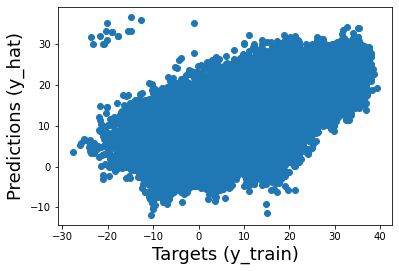

mean_squared_error:  64.5151761151463


In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()
print("mean_squared_error: ",mean_squared_error(y_train, y_hat))

at the end use model on test data to predict

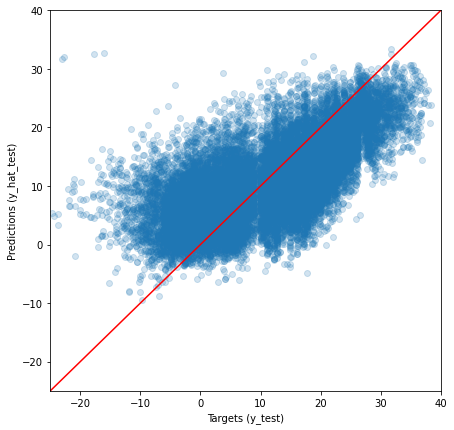

mean_squared_error:  65.28265517387717


In [12]:
y_hat_test = reg.predict(x_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim([-25, 40])
plt.ylim([-25, 40])
plt.axline([0, 0], [1, 1], color='r')
plt.show()
print("mean_squared_error: ",mean_squared_error(y_test, y_hat_test))


in our trained model , weights are : 

In [13]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Humidity,-6.195613
1,Wind Speed (km/h),-2.262348
2,Wind Bearing (degrees),0.441165
3,Visibility (km),2.007106
4,Pressure (millibars),-0.190964


now lets go to Using  Ridge Regression, Lasso Regression or Elastic Net and comparing them  

Ridge Regression

In [14]:
mse=[]

for i in np.linspace(1,20,100):
    reg1 = Ridge(alpha=i)
    reg1.fit(x_train,y_train)
    pred=reg1.predict(x_train)
    mse.append(mean_squared_error(y_train,pred))  
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg1.coef_
reg_summary

,Features,Weights
0,Humidity,-6.193754
1,Wind Speed (km/h),-2.261322
2,Wind Bearing (degrees),0.440942
3,Visibility (km),2.007176
4,Pressure (millibars),-0.190885


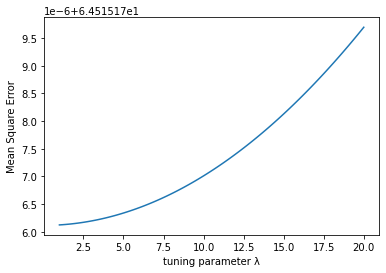

In [15]:
plt.plot(np.linspace(1,20,100),mse)
plt.xlabel('tuning parameter λ')
plt.ylabel('Mean Square Error')
plt.show()

Lasso Regression

In [16]:
mse=[]

for i in np.linspace(0.01,0.4,100):
    
    reg2 = Lasso(alpha=i)
    reg2.fit(x_train,y_train)
    pred=reg2.predict(x_train)
    mse.append(mean_squared_error(y_train,pred))
 
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg2.coef_
reg_summary



,Features,Weights
0,Humidity,-5.775270
1,Wind Speed (km/h),-1.681887
2,Wind Bearing (degrees),0.000000
3,Visibility (km),1.713902
4,Pressure (millibars),-0.000000


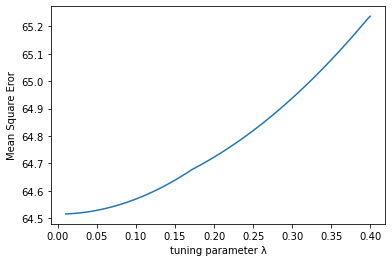

In [17]:
plt.plot(np.linspace(0.01,0.4,100),mse)
plt.xlabel('tuning parameter λ')
plt.ylabel('Mean Square Eror')
plt.show()

Elastic Net

In [18]:
mse=[]
for i in np.linspace(0.01,0.4,100):
    
    reg3 = ElasticNet(alpha=i)
    reg3.fit(x_train,y_train)
    pred=reg3.predict(x_train)
    mse.append(mean_squared_error(y_train,pred))
   
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg3.coef_
reg_summary


,Features,Weights
0,Humidity,-4.893306
1,Wind Speed (km/h),-1.424707
2,Wind Bearing (degrees),0.137230
3,Visibility (km),1.839593
4,Pressure (millibars),-0.000000


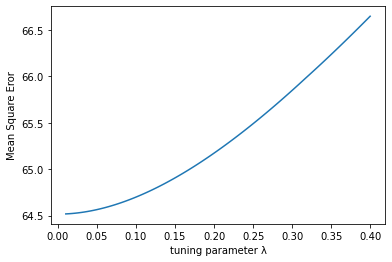

In [19]:
plt.plot(np.linspace(0.01,0.4,100),mse)
plt.xlabel('tuning parameter λ')
plt.ylabel('Mean Square Eror')
plt.show()


 we can see that in Ridge we have weights near leanier and in other pressure wright is 0 .

Parameters in Ridge tends towards zero whereas parameters in Lasso actually approaches zero. Which indicates that Lasso can be actually used in feature selection as well apart from regularisation.
so we can findout from result that we can drop Pressure from data.